# Project-Loan Application Status Prediction
**Problem Statement:**

**This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.** 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

**- Loan_Status**

**You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.** 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Observations on the first go----**

**Loan_ID is a seprate ID number given to customers and it does not play any role in providing loan,we are going to drop this feature**

**Gender,Married,Education and Self_Employed features requires encoding**

**We are encountering NAN values and zeroes in dataset we need to check the same and have to correct the same**

**Property area also requires encoding**

**Loan_Status which is our Target variable also requires Encoding**

**We need to check and clean the Data**





In [3]:
#checking Duplicate values in Dataset
df.duplicated().sum()

0

**No duplicate values are present in Dataset**

In [41]:
#Checking count of null values in Dataset
pd.DataFrame(df.isna().sum())

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [42]:
pd.DataFrame(df.nunique())

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


**Loan_ID is having 614 unique values which is not acceptable for learning we are going to drop this feature**

In [6]:
df.drop(columns=['Loan_ID'],inplace=True)

In [44]:
#Checking Datatype in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


**Checking overall health of Data**

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


                                        **Observations**

**Mean and STD of features are not looking satisfactory where we can also see certain amount of skewness present in dataset this summary is also giving us a clear cut edge of outliers present in our Dataset**

**Filling Values where continuous data is filled with mean method and categorical data with mode method**

In [45]:
# filling continous data columns with the mean value of that column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# filling categorical data columns with the mode value of that column
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


**Recheck of Null Values**

In [63]:
pd.DataFrame(df.isnull().sum())

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

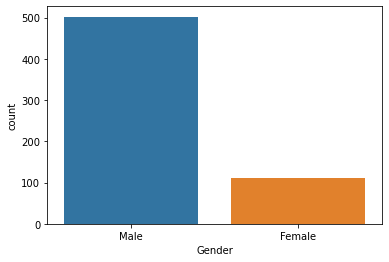

In [51]:
print(df['Gender'].value_counts())
sns.countplot(x=df['Gender'],data=df)

                         **Observations**

**Count of Males applying for loan are more as compared with females**



Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

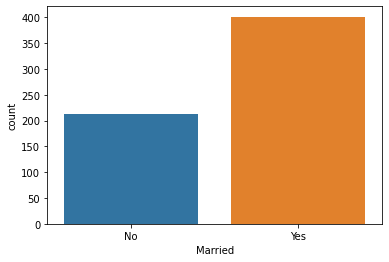

In [52]:
print(df['Married'].value_counts())
sns.countplot(x=df['Married'],data=df)

                             **Observations**

**Married people have more requirments for loan as compared with Unmarried peoples**                            

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

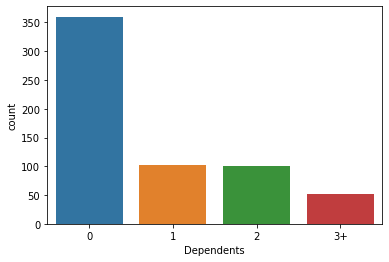

In [48]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

                          **Observations**
**Customer having 0 dependents are in more need of loan as compared with subsequent increase in numbers of dependents**                          
                          

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

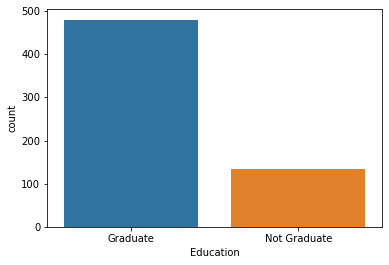

In [17]:
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df)

                                    **Observations**

**Customer having a graduate degree is applying more for loans as compared with Non-Graduate customers**

No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

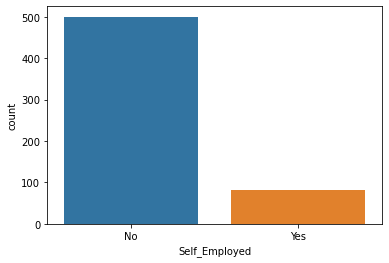

In [19]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df)

                                   **Observations**
                                   
**Customers having own business are not applying in abundance as compared with customers who are not having their own business**                                   

1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

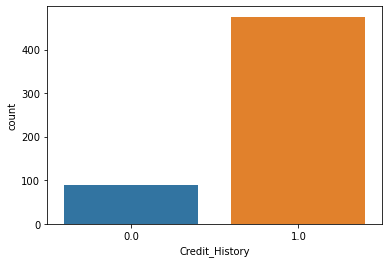

In [20]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df)

                                   **Observations**
                                   
**Customers having credit history is applying more for loans as compared with customers having no credit history**                                   

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

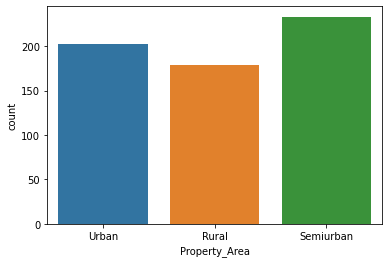

In [22]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area',data=df)

                                      **Observations**
                                      
**Semiurban customers are more in numbers for applying loan followed by Urban area customers & Rural_Property_Area customers**                                       

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

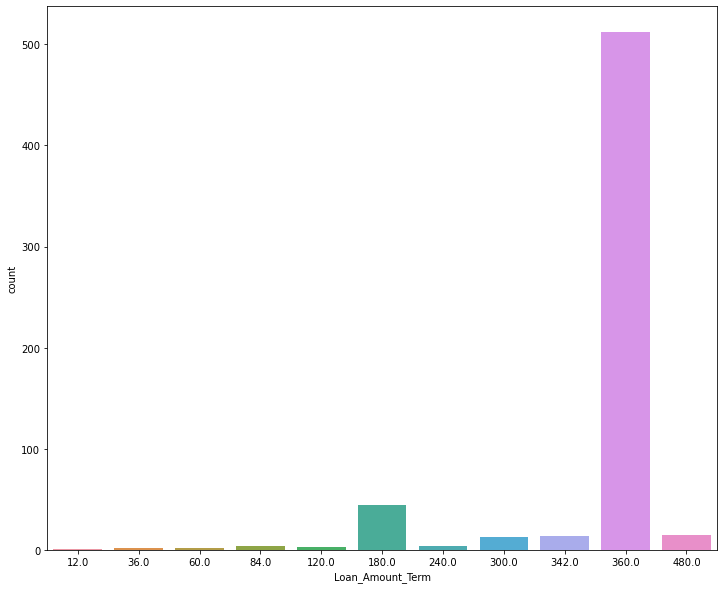

In [72]:
print(df['Loan_Amount_Term'].value_counts())
plt.figure(figsize=(12,10))
sns.countplot(x='Loan_Amount_Term',data=df)

                                 **Observations**

**Highest count prefered by customers for choosing the time period for sanction of loan is 360**

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

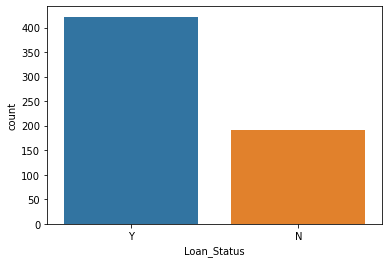

In [23]:
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=df)

                                **Observations**

**Class Imbalance is present in our Target variable we need to correct the same pre for model training**

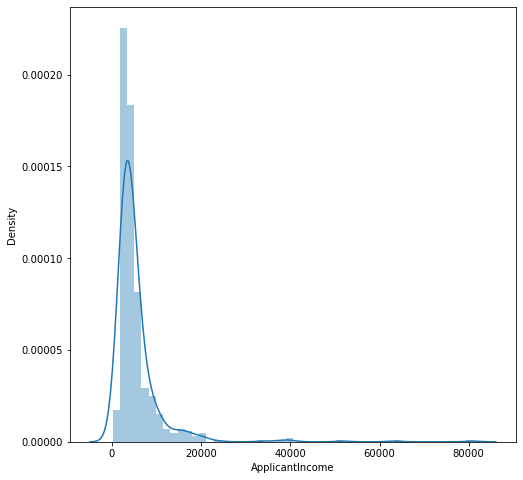

In [67]:
plt.figure(figsize=(8,8))
sns.distplot(df['ApplicantIncome'])

plt.show()

                                   **Observations**
                                   
 **ApplicantIncome is showing Skewness on the positive side we need to correct the skewness in our continuous features**
 
 **We need to visualize the same using Boxplot**

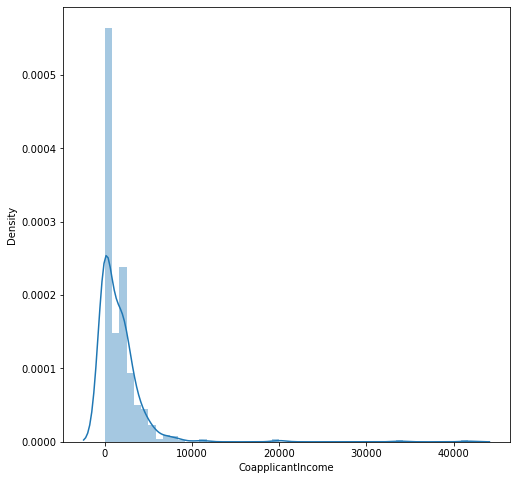

In [69]:
plt.figure(figsize=(8,8))
sns.distplot(df['CoapplicantIncome'])

plt.show()

                                     **Observations**
**Co-applicant income is showing Skewness on the positive side we need to correct the skewness in our continuous features**

**We need to visualize the same using Boxplot**

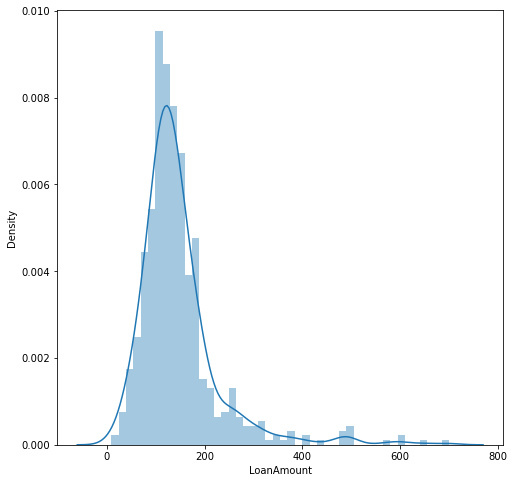

In [73]:
plt.figure(figsize=(8,8))
sns.distplot(df['LoanAmount'])

plt.show()



                                            **Observations**

**LoanAmount income is showing Skewness on the positive side we need to correct the skewness in our continuous features**

**We need to visualize the same using Boxplot**

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

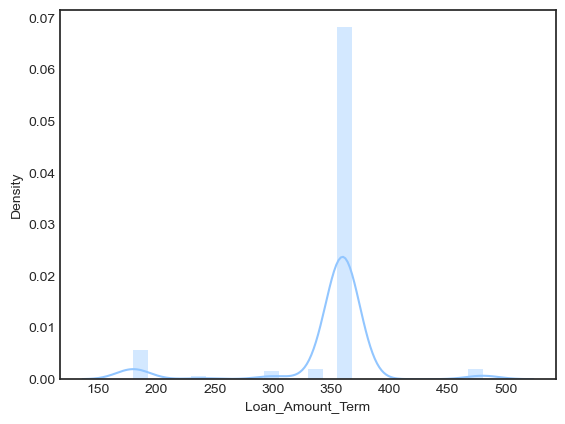

In [171]:
sns.distplot(df['Loan_Amount_Term'])

                                        **Observations**

**Loan_Amount_Term is showing Bimodal distribution data is not distributed normally**

**Presence of outliers on both(higher and lower) sides are reflecting**

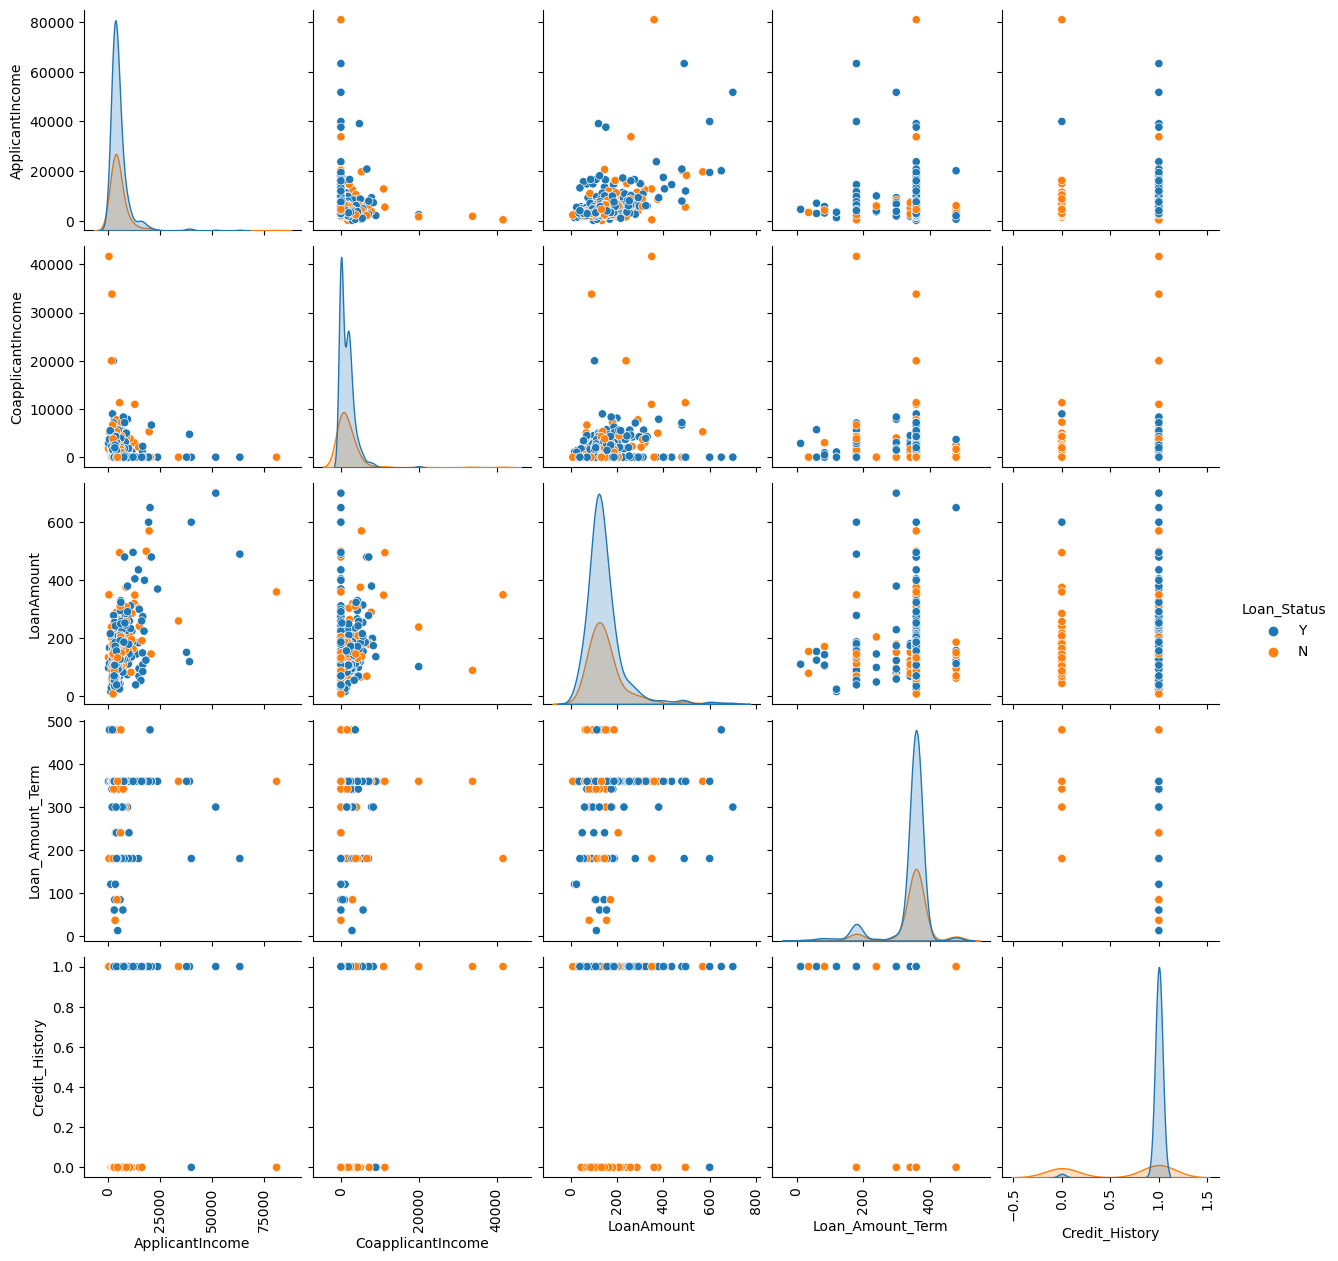

In [98]:
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

**We have plotted this pairplot to visualize the pattern and distributions for our continuous data columns showing the distribution of numeric data type in each columns**

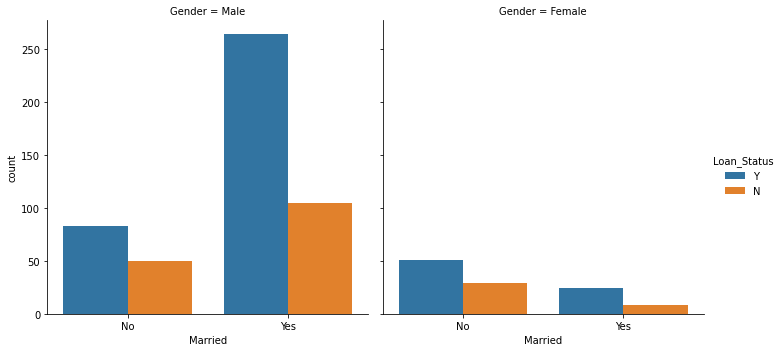

In [75]:
sns.catplot(x='Married',hue='Loan_Status',col='Gender',kind='count',data=df)

                                            **Observations**
 
**Married males are inculcate with most of the loan sanctioning & moreover by considering this data it has also been visualized as the most approved profile for sanctioning of Loan**

**This married males category can be targeted by sales and marketing team for future references**

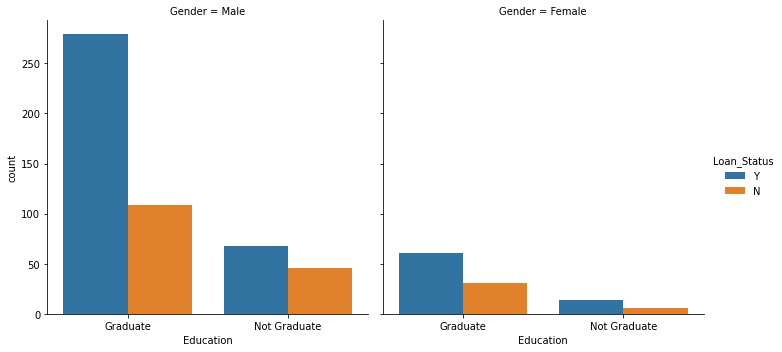

In [76]:
sns.catplot(x='Education',hue='Loan_Status',col='Gender',kind='count',data=df)

                              **Observations**

**Males customers having graduate degrees are getting more approvals for sanctioning of loans as compared with undergraduate males**

**On the other side females customers are also showing the same tred where we can visualize the Graduate females are having more sacctions of Loans as compared to non-graduate females**

**Graduate customers are having more chances for sanctioning of loan as compared to non-graduate customers and this can be useful tool in initial profiling of cuustomers while applying for the same** 

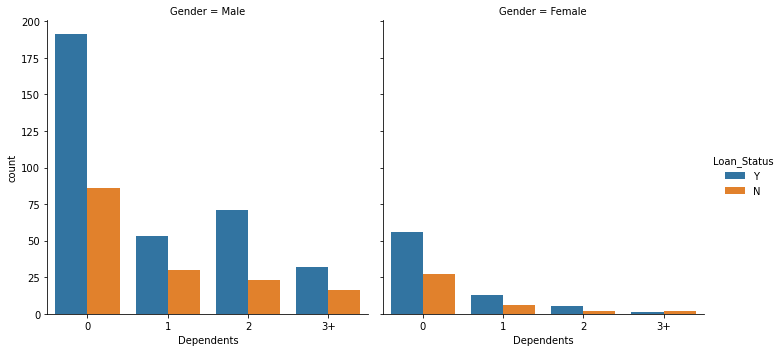

In [88]:
sns.catplot(x='Dependents',hue='Loan_Status',col='Gender',kind='count',data=df)

                                      **Observations**
                                      
**Male Customers having zero dependents are having maximum sanction on loan approvals where we can visualize the same pattern for female customers as females are less in count in our dataset we can can assume that same trend has been followed considering females**                                  

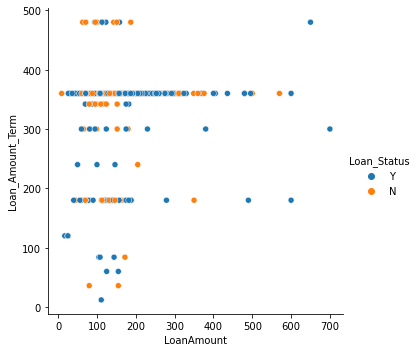

In [86]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')


                                  **Observations**

**Customers are present for almost all the segment for term of loan where maximum sanction area is around 380 for Term and considering amount the mostly data points has been visualized between 180-280**                                 

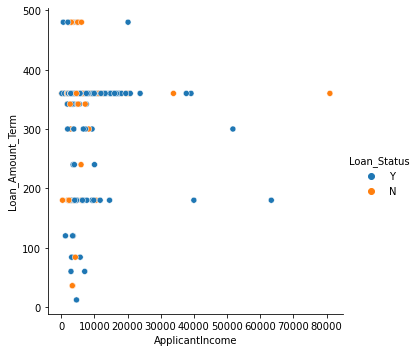

In [87]:
sns.relplot(data=df, x='ApplicantIncome', y='Loan_Amount_Term', hue='Loan_Status')


                                     **Observations**
                                     
**Maximum approvals considering income is between 8000-25000 where can visualize the data points scattering at same**

**Term for same is preferable beween 350-380 this same term has been visualized previously where we have got the maximum counts for term 360**

In [74]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

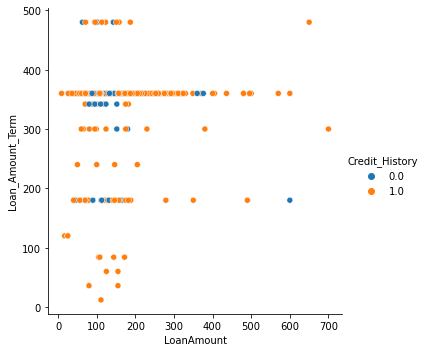

In [91]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')

                                  **Observations**

**Customers having credit history are amongst the one who are having maximum approvals for loan where if we consider customers without any credit history sanctioning of loan has been visualized as challenging**

**On maximum note data points are scattered between 180-380 for term of loan where loan amount and term is showing relationship upto mid value of Loan amount i.e. 400**


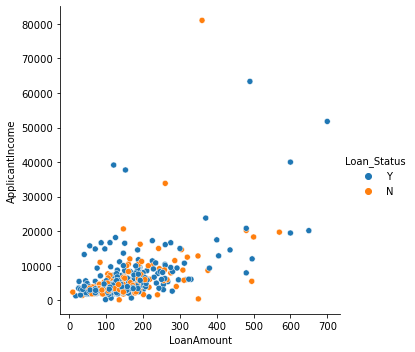

In [92]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')

                                    **Observations**

**On an average sanctions are superseeding rejections from starting to value upto 300 where high rise of income has one rejection where amount applied for loan is very less as compared to income of the customer**

**Customers having income of 15000 has been visualized as very less rejected considering the number of Datapoints**
                                    

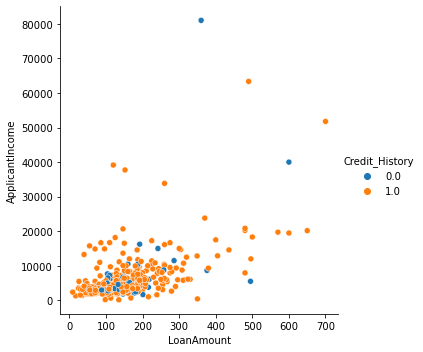

In [93]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')

                                    **Observations**

**Customers having credit history is amongst the one who has been identified as the most likely base for applying loan we have also visualized a pattern where these customers are also getting maximum approvals**

**It is also correlated to income where customer having income is having a credit history and are prefered for sanctioning**

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

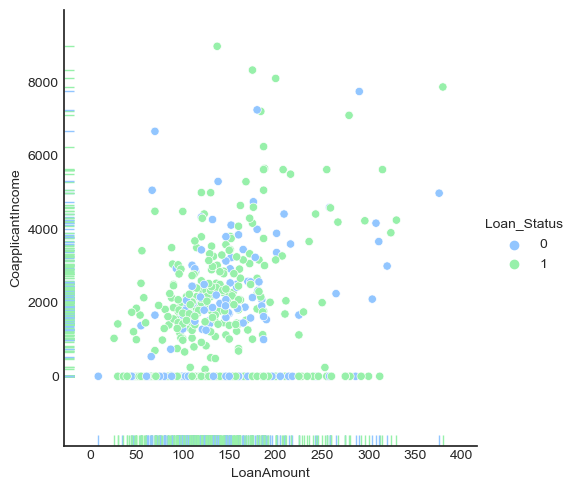

In [129]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status',legend=False)

                            **Observations**
                            
**We can visualize for almost all the points are in range 1000-2200 for co applicant income where Loan amount is also in between 100-180 and credit history is availaible for the same**                             

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

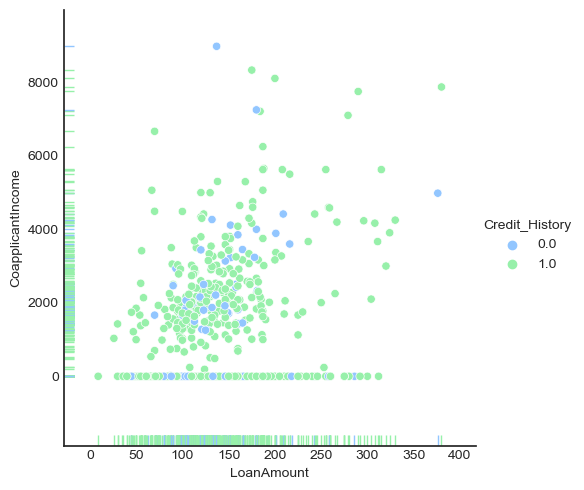

In [131]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)



**we can visualize that almost all the points for co applicant income are in between 1400 to 2200 where credit history has also found to be present and for loan amount maximum points are in between 80 - 150**

**Encoding**

In [99]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder

le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [100]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


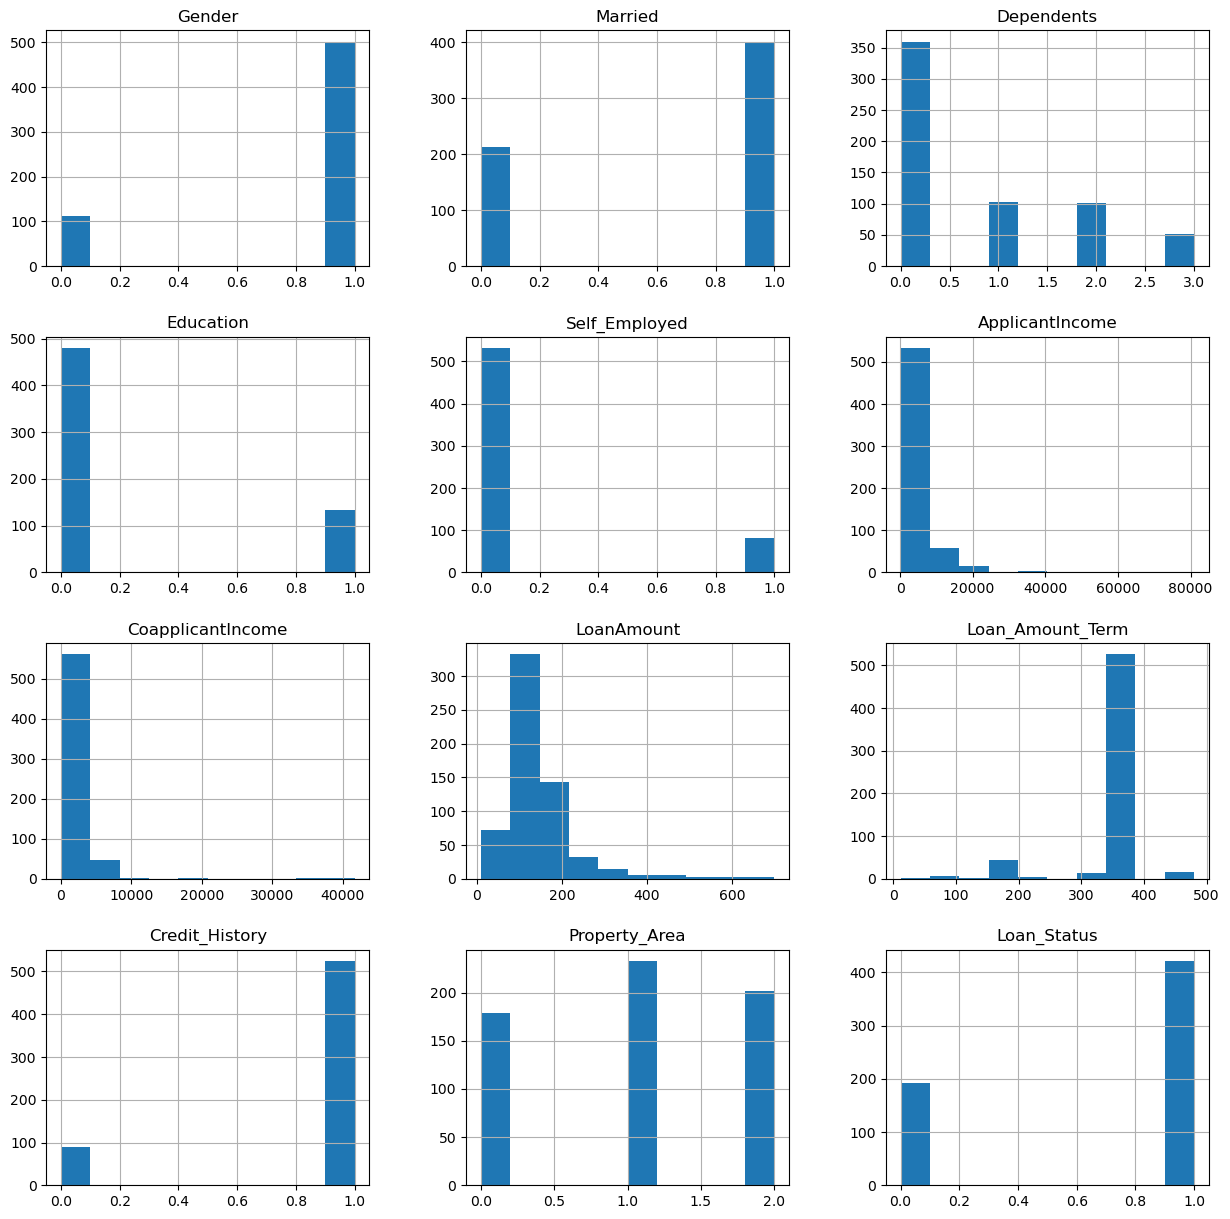

In [102]:
df.hist(figsize=(15,15))
plt.show()


**Plotted histogram after encoding**

**Outliers**

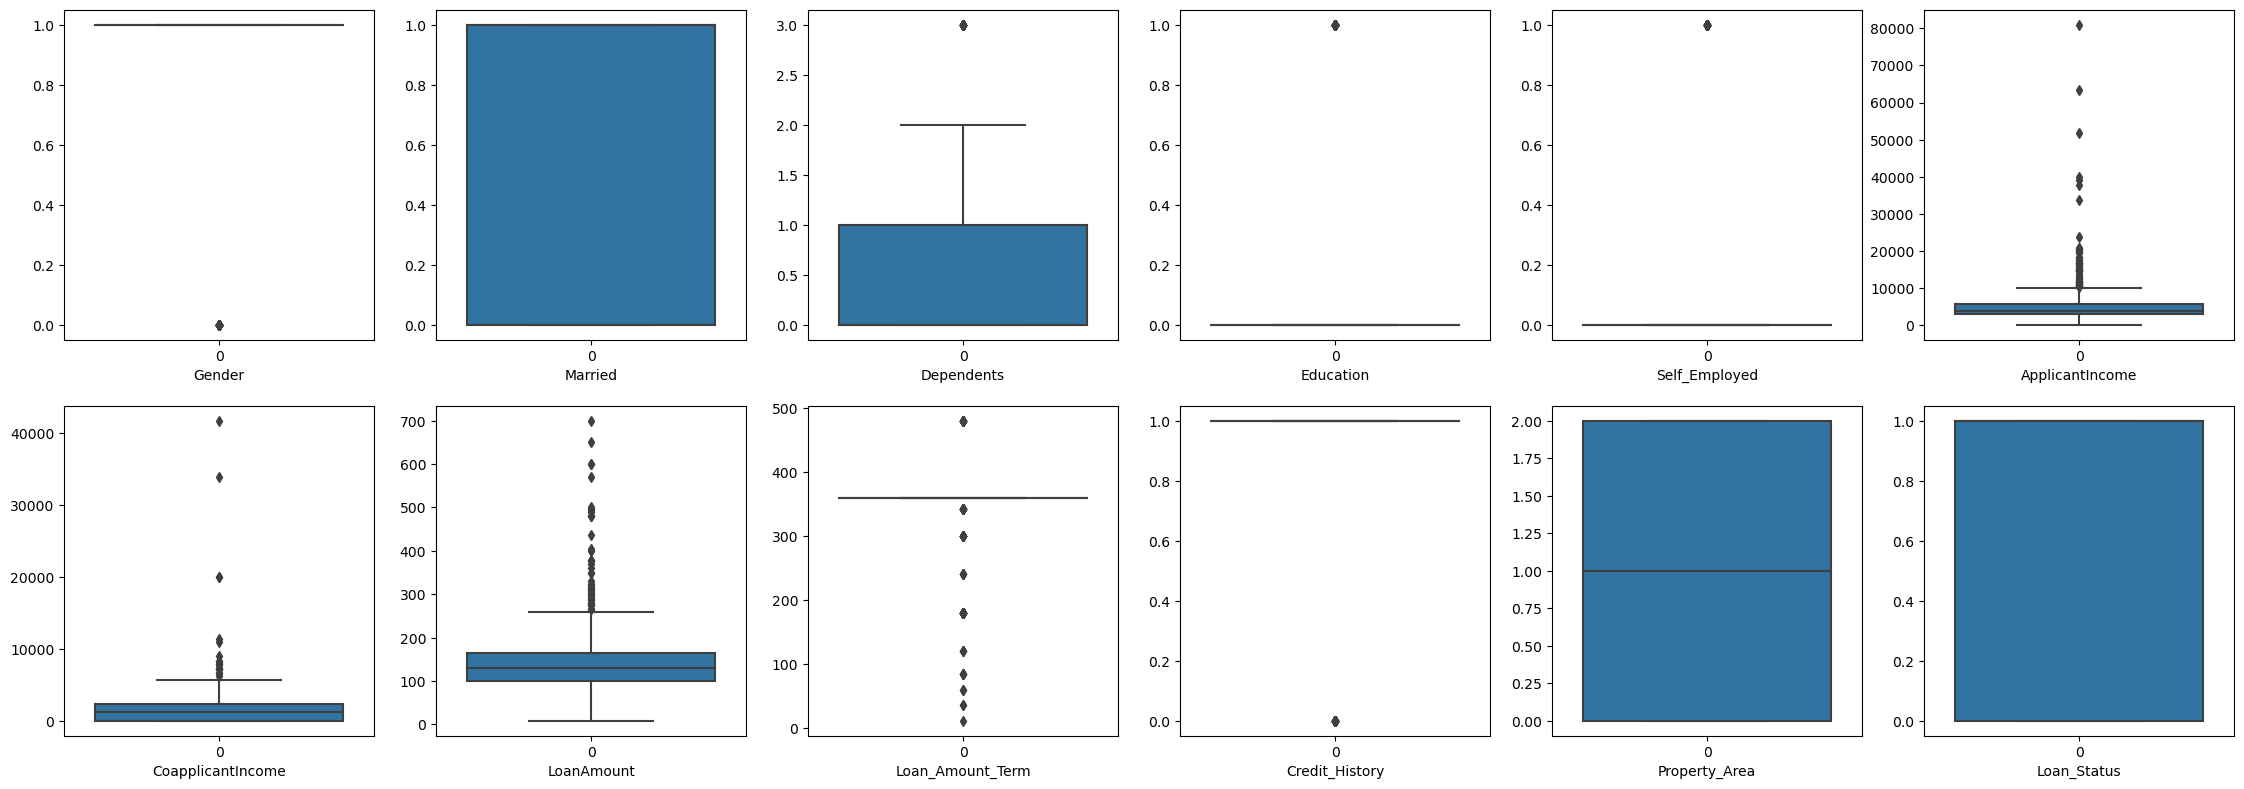

In [101]:
plt.figure(figsize=(28,30))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**We can visualize that outliers are present for almost all the features**

**Correlation**

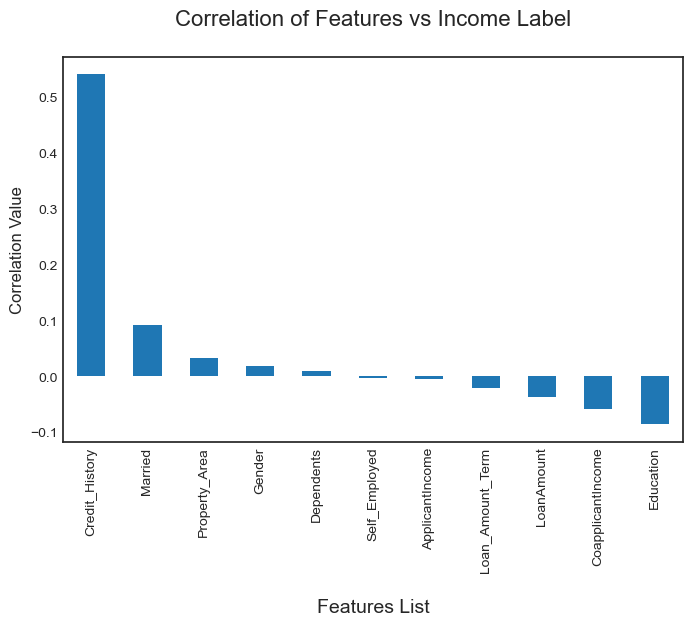

In [103]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(8,5))
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

                                           **Observations**
                                           
**Credit_history is the highest correlated   feature we can visualize that Education is amongst the most negatively correlated features**                                         

**Removing Outliers**

In [105]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name


Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


**Percentage loss is acceptable**

**Outliers Recheck**

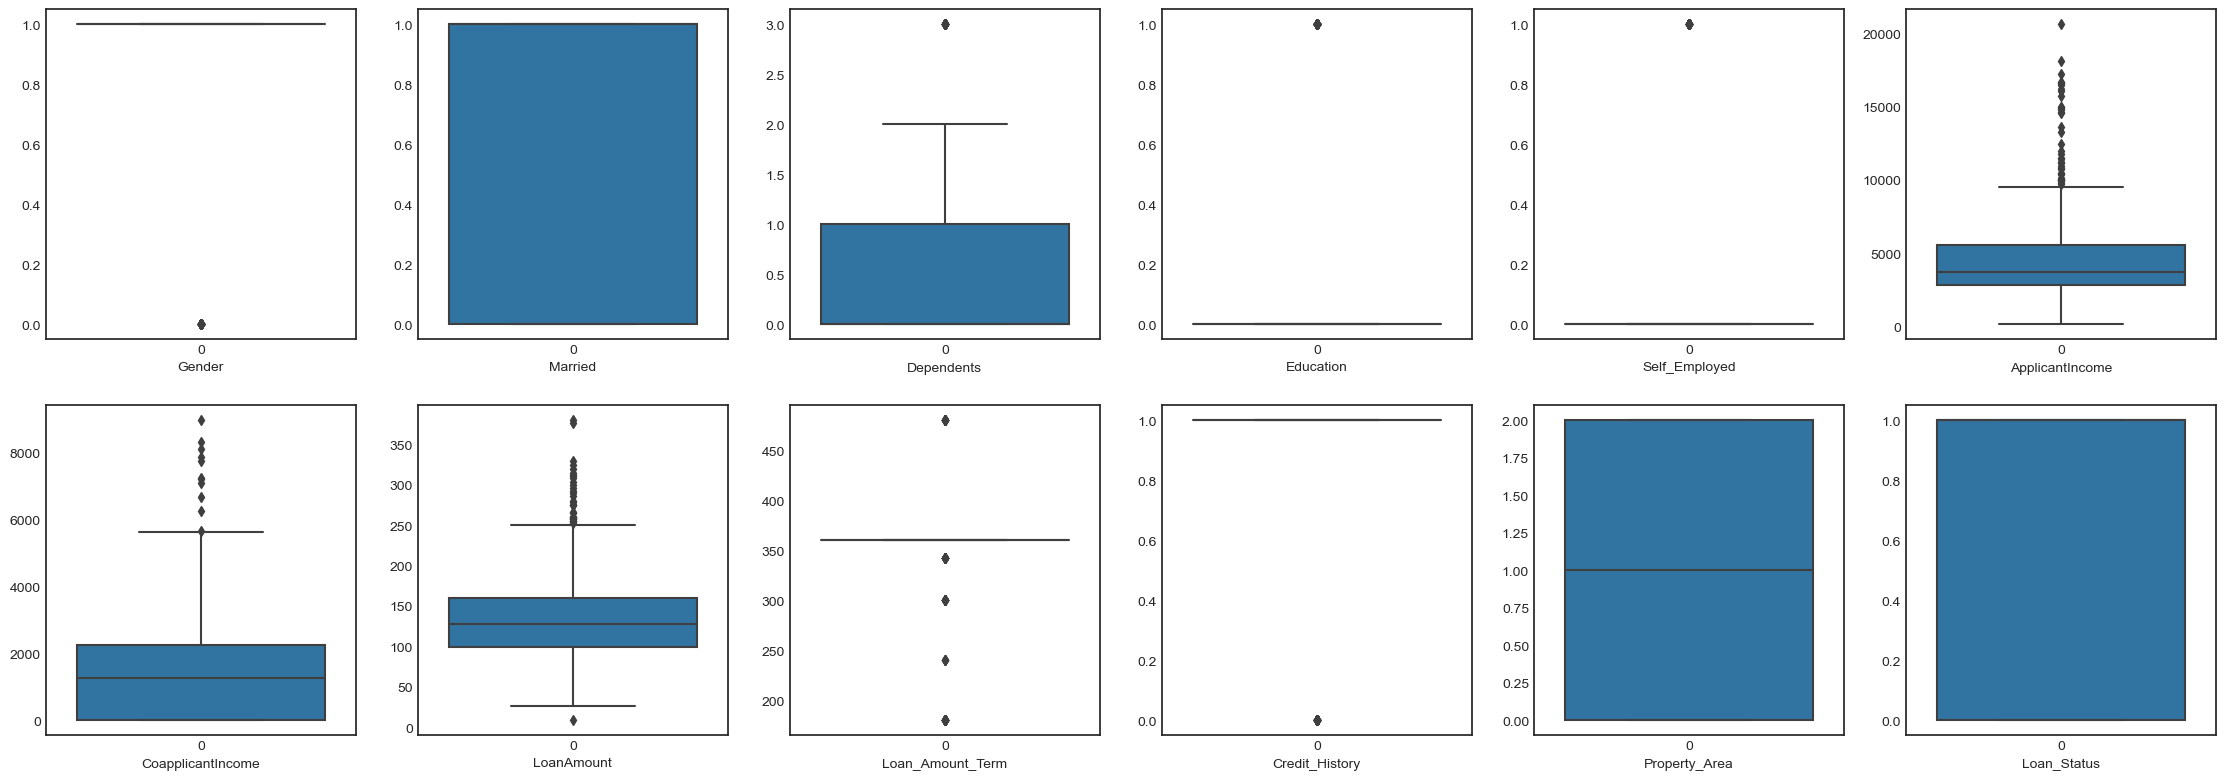

In [108]:
plt.figure(figsize=(28,30))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Outliers are in complete controll**

**Dividing features and label**

In [109]:
x= df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

**Skewness**

In [110]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

**Using Power Transformer to remove skewness(Method-'Yeo-johnson')**

In [111]:
from sklearn.preprocessing import PowerTransformer

In [112]:
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142609,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142609,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.142609,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142609,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142609,0.418513,1.194806


**Visualizing skewness**

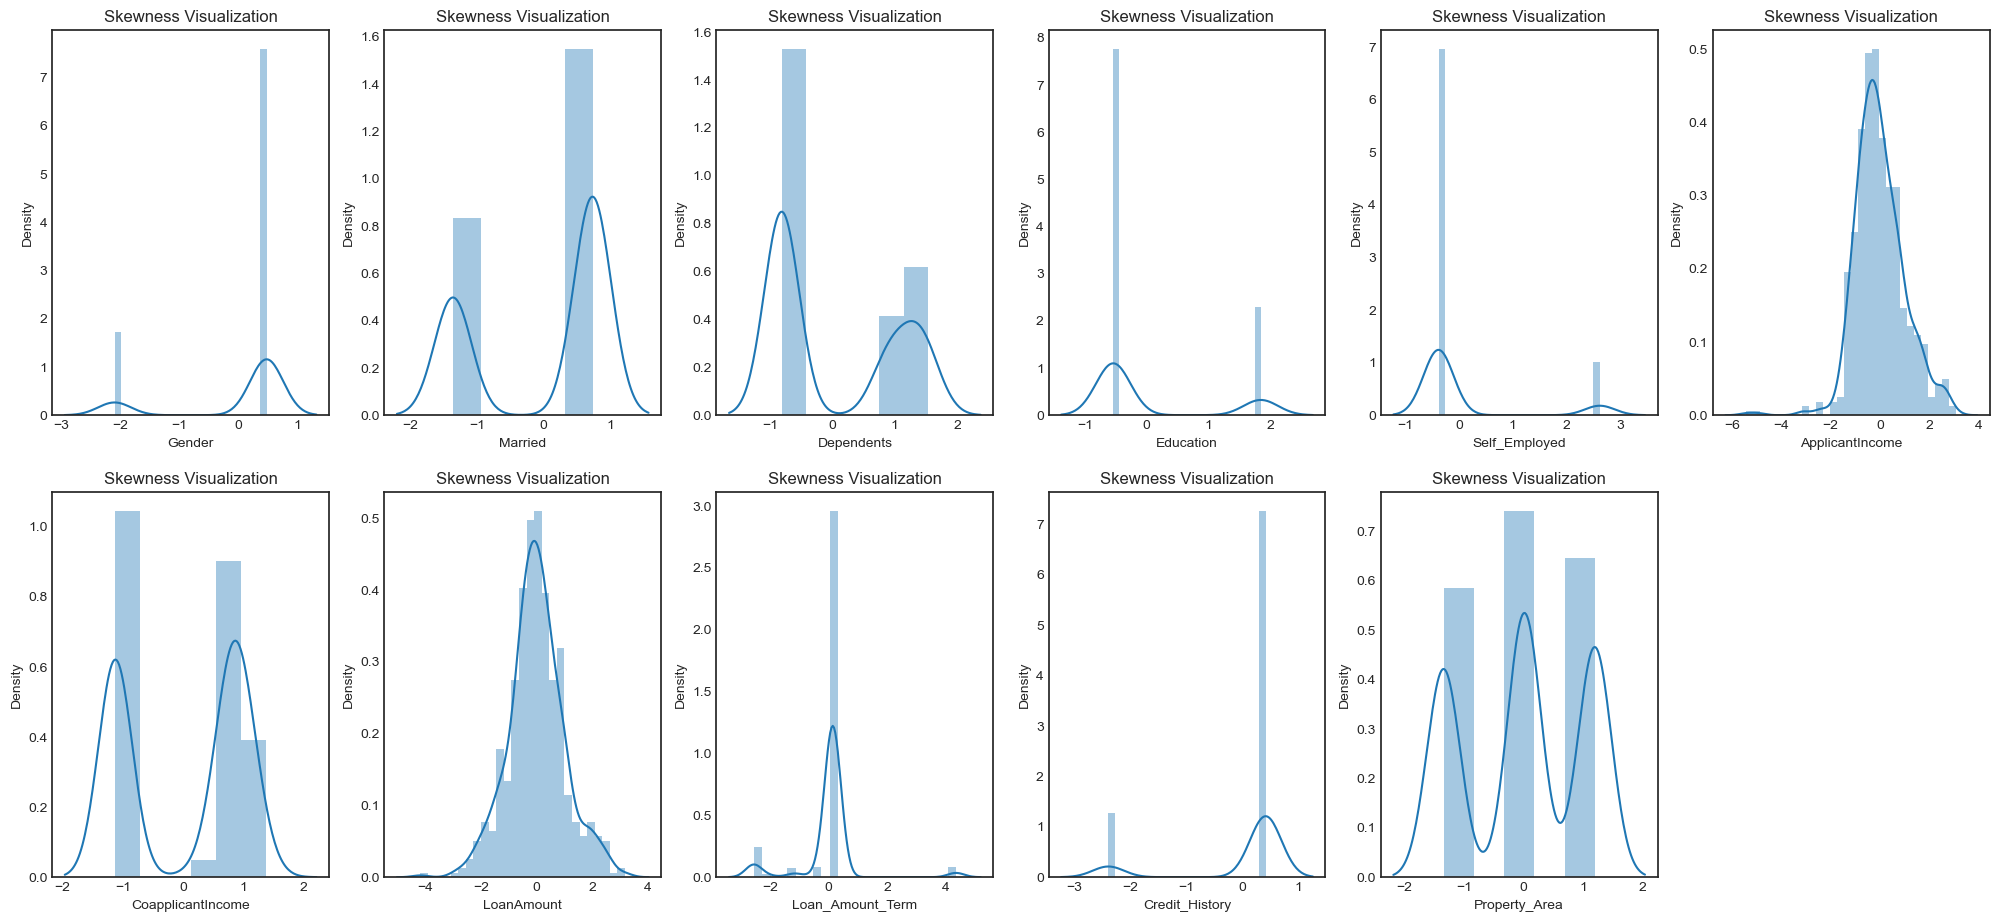

In [113]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in x:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.distplot(x[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show() 

**Skewness is in complete controll**

**Multi_Collinearity check using Heatmap**

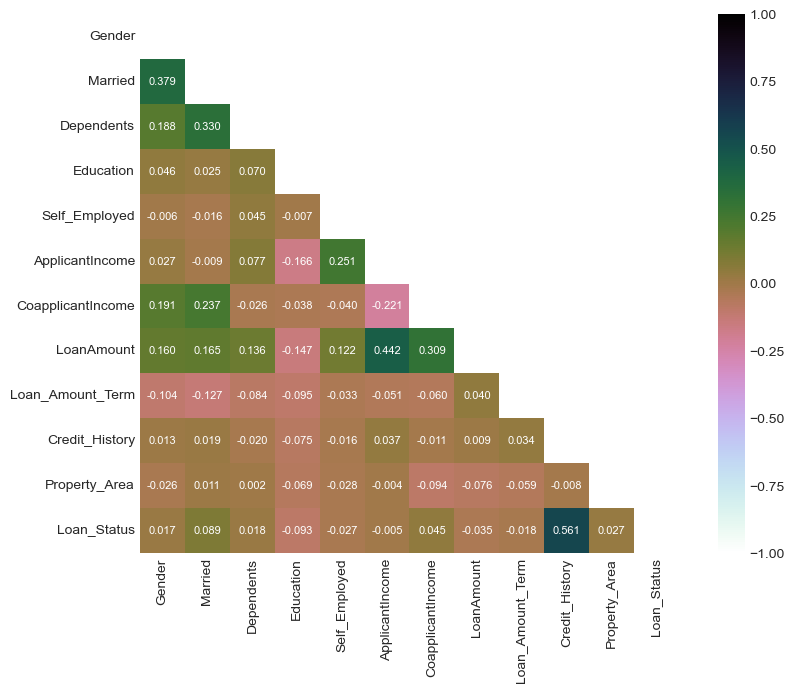

In [119]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**No Problem of Multi-Collinearity has been visualized**

**VIF**

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Gender,1.219265
1,Married,1.433527
2,Dependents,1.184111
3,Education,1.065654
4,Self_Employed,1.055700
5,ApplicantIncome,1.764886
6,CoapplicantIncome,1.577502
7,LoanAmount,1.546562
8,Loan_Amount_Term,1.048603
9,Credit_History,1.008795


**we have checked the same using VIF and results are satisfactory**

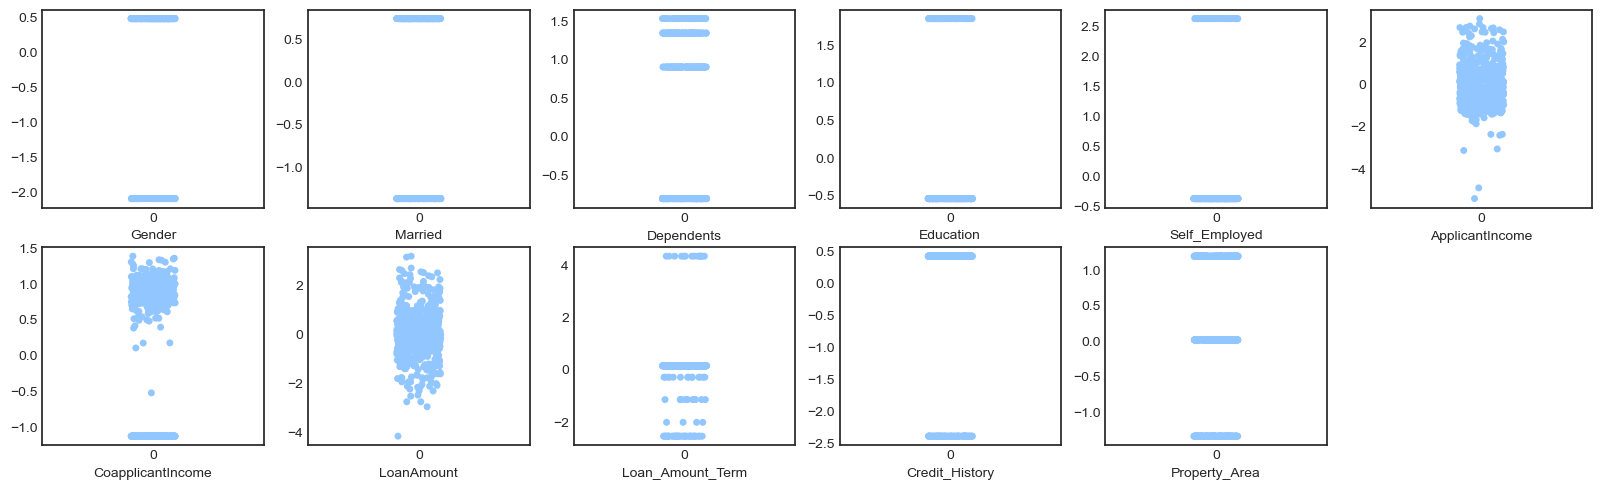

In [121]:
plt.figure(figsize=(20,18))
plotnumber=1
for column in x:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.stripplot(data=x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()  

**All features are in good shape to proceed with our Model building**

In [126]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


**Class Imbalance handling using SMOTE**

In [140]:
from imblearn.over_sampling import SMOTE

In [143]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [144]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

**We have visualised earlier their is a class imbalance in our target  we have corrected the same and now it is satisfactory**

In [145]:
##Scaling data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474059,-1.330998,-0.842132,-0.578255,-0.402346,0.695395,-1.096760,0.295593,0.104596,0.553732,1.241808
1,0.474059,0.777501,0.904699,-0.578255,-0.402346,0.231012,0.788810,-0.044820,0.104596,0.553732,-1.288339
2,0.474059,0.777501,-0.842132,-0.578255,2.549039,-0.560607,-1.096760,-1.508454,0.104596,0.553732,1.241808
3,0.474059,0.777501,-0.842132,1.779357,-0.402346,-0.835677,0.942025,-0.202736,0.104596,0.553732,1.241808
4,0.474059,-1.330998,-0.842132,-0.578255,-0.402346,0.744293,-1.096760,0.198584,0.104596,0.553732,1.241808


**Finding maximum accuracy**

In [146]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 84.42211055276381 on Random State 905


**Splitting data for Training and Testing by using Train_Test_Split**

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=905)


**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [148]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**Decision Tree Classifier**

In [151]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 79.89949748743719

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       108
           1       0.75      0.84      0.79        91

    accuracy                           0.80       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199

Cross Validation Score: 78.26729559748428

Accuracy Score - Cross Validation Score is 1.6322018899529098


**Random Forest Classifier**

In [152]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 81.90954773869346

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       108
           1       0.76      0.88      0.82        91

    accuracy                           0.82       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.83      0.82      0.82       199

Cross Validation Score: 82.54716981132076

Accuracy Score - Cross Validation Score is -0.6376220726272948


**KNeighbors Classifier**

In [153]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 73.36683417085426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.64      0.72       108
           1       0.66      0.85      0.74        91

    accuracy                           0.73       199
   macro avg       0.75      0.74      0.73       199
weighted avg       0.75      0.73      0.73       199

Cross Validation Score: 73.24606918238993

Accuracy Score - Cross Validation Score is 0.12076498846433026


**XGB Classifier**

In [154]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 78.39195979899498

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       108
           1       0.72      0.86      0.78        91

    accuracy                           0.78       199
   macro avg       0.79      0.79      0.78       199
weighted avg       0.80      0.78      0.78       199

Cross Validation Score: 80.78930817610065

Accuracy Score - Cross Validation Score is -2.397348377105672


**HyperParameter Tuning on final model KNeighbors Classifier**

In [ ]:
KNeighborsClassifier()

In [162]:
fmod_param = {'weights' : ['uniform', 'distance'],
              'leaf_size' : [2, 3, 4],
              'algorithm':['kd_tree','brute'],
              'n_neighbors' : [2,3,4,5]}

In [163]:
GSCV = GridSearchCV(KNeighborsClassifier(), fmod_param, cv=5)

In [164]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4], 'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [165]:
GSCV.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 2,
 'n_neighbors': 2,
 'weights': 'distance'}

In [166]:
Final_Model = KNeighborsClassifier(algorithm="kd_tree", leaf_size=2, n_neighbors=2,weights='distance')
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 81.4070351758794


**ROC Curve**

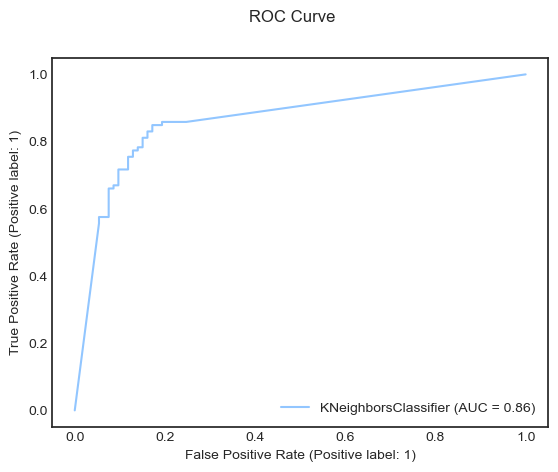

In [167]:
auc = metrics.plot_roc_curve(Final_Model, x_test, y_test)
auc.figure_.suptitle("ROC Curve")
plt.show()

**Confusion Matrix**

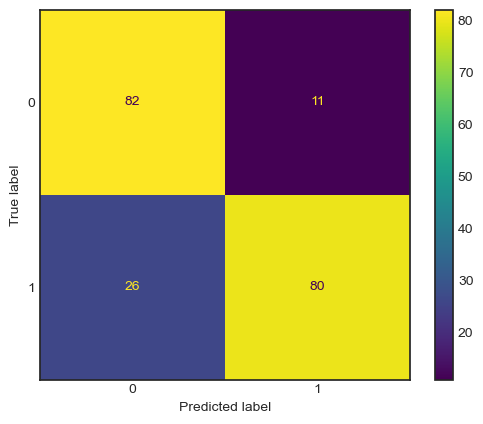

In [168]:
metrics_n = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)

plt.show()

**Saving Final model**

In [169]:
import joblib

In [170]:
filename = "Final_DT.pkl"
joblib.dump(Final_Model, filename)

['Final_DT.pkl']

**Model Completed**

# Regression Model